Jazlyn Jose(210236)

# PROBLEM 1

PROBLEM STATEMENT : With the rise of social media and the COVID-19 pandemic, cyberbullying has become a significant issue affecting people of all ages. The task is to develop a text classification model that can automatically identify potentially harmful tweets and analyze patterns of hatred. The dataset, containing over 47,000 tweets, is labeled based on various classes of cyberbullying, including age, ethnicity, gender, religion, other types of cyberbullying, and non-cyberbullying. The goal is to combat cyberbullying by creating models that can flag harmful tweets and provide insights into the patterns of hatred on social media.





EXPECTED OUTCOME : The expected outcome is a text classification model capable of categorizing tweets into different classes of cyberbullying, such as age, ethnicity, gender, religion, and other types, or determining if the tweet does not involve cyberbullying. The model's performance will be evaluated using metrics like accuracy


ABOUT THE DATASET : [Cyberbullying Classification Dataset](https://)
As social media usage continues to rise, cyberbullying has become a pressing issue, especially during the COVID-19 pandemic. The dataset comprises over 47,000 tweets labeled according to various classes of cyberbullying, including age, ethnicity, gender, religion, other types of cyberbullying, and non-cyberbullying. The dataset has been balanced to contain approximately 8,000 samples for each class.

METHODOLOGY :
1. Data exploration
2. Data pereprocessing
3. Tokenisation
3. Modelling : LSTM, GRU, WORD2VEC
4. Evaluating on accuracy

# IMPORTING DATASET

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jazlyn23123","key":"254bf9817236eddb05921c01614a3abc"}'}

In [ ]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/

In [ ]:
!kaggle datasets download -d andrewmvd/cyberbullying-classification

  0% 0.00/2.82M [00:00<?, ?B/s]
100% 2.82M/2.82M [00:00<00:00, 148MB/s]


In [ ]:
import zipfile

# Define the path to the uploaded ZIP file
zip_file_path = '/content/cyberbullying-classification.zip'

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import random
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as go

In [ ]:
df = pd.read_csv("cyberbullying_tweets.csv")

In [ ]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [ ]:
 df.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


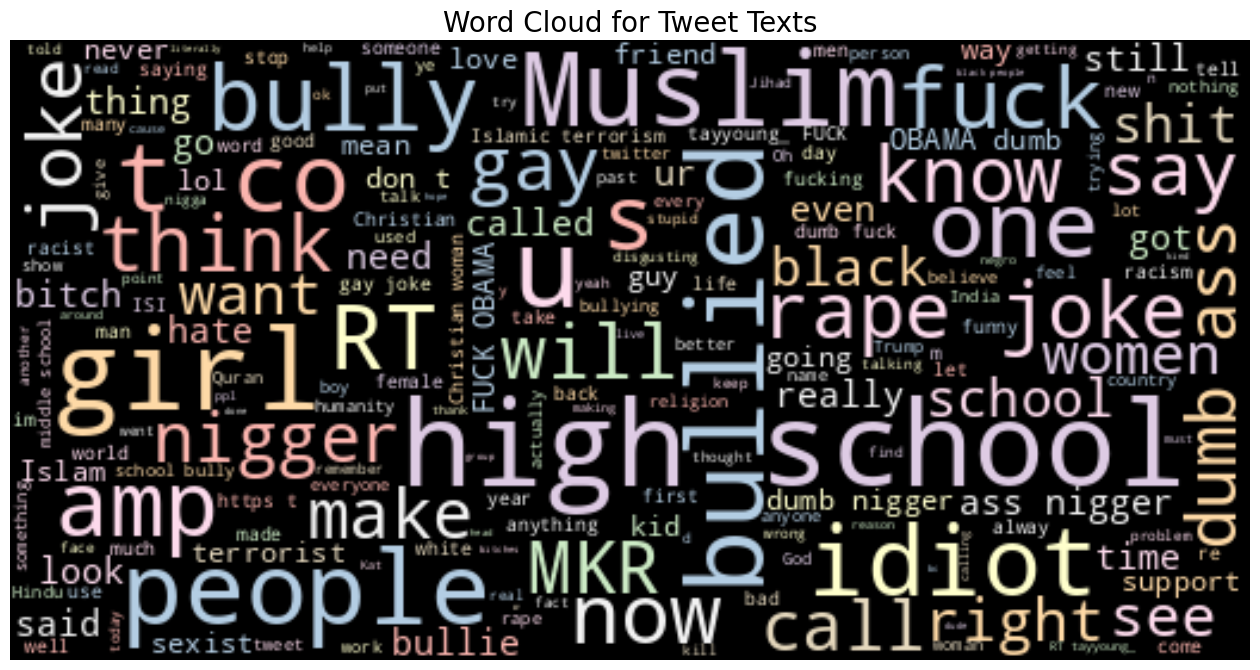

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

ham_msg_text = ' '.join(df['tweet_text'].dropna())

# WordCloud generation
ham_msg_cloud = WordCloud(
    width=520,
    height=260,
    stopwords=STOPWORDS,
    max_font_size=50,
    background_color="black",
    colormap='Pastel1'
).generate(ham_msg_text)

plt.figure(figsize=(16, 10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Tweet Texts', fontsize=20)
plt.show()

# DATA PREPROCESSING

In [ ]:
# storing the data in lists
tweet, type = list(df['tweet_text']), list(df['cyberbullying_type'])

In [ ]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['cyberbullying_type_encoded'] = labelencoder.fit_transform(df['cyberbullying_type'])

In [ ]:
df[['cyberbullying_type', 'cyberbullying_type_encoded']].value_counts()

cyberbullying_type   cyberbullying_type_encoded
religion             5                             7998
age                  0                             7992
gender               2                             7973
ethnicity            1                             7961
not_cyberbullying    3                             7945
other_cyberbullying  4                             7823
dtype: int64

In [ ]:
# converting tweet text to lower case
df['tweet_text'] = df['tweet_text'].str.lower()
df.tail()

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
47687,"black ppl aren't expected to do anything, depe...",ethnicity,1
47688,turner did not withhold his disappointment. tu...,ethnicity,1
47689,i swear to god. this dumb nigger bitch. i have...,ethnicity,1
47690,yea fuck you rt @therealexel: if youre a nigge...,ethnicity,1
47691,bro. u gotta chill rt @chillshrammy: dog fuck ...,ethnicity,1


In [ ]:
# cleaning and removing punctuations

import string
english_puctuations = string.punctuation

def clean_puctuations(text):
    translator = str.maketrans('','', english_puctuations)
    return text.translate(translator)

df['tweet_text'] = df['tweet_text'].apply(lambda x : clean_puctuations(x))

In [ ]:
# cleaning and removing repeating characters

def clean_repeating_characters(text):
    return re.sub(r'(.)1+', r'1', text)

df['tweet_text'] = df['tweet_text'].apply(lambda x: clean_repeating_characters(x))

In [ ]:
# cleaning and removing URLs

def clean_URLs(text):
    return re.sub(r"((www.[^s]+)|(http\S+))","",text)

df['tweet_text'] = df['tweet_text'].apply(lambda x : clean_URLs(x))

In [ ]:
# cleaning and removing numeric data

def clean_numeric(text):
    return re.sub('[0-9]+', '', text)

df['tweet_text'] = df['tweet_text'].apply(lambda x: clean_numeric(x))

In [ ]:
# Clean emojis from text
def strip_emoji(text):
    return emoji.get_emoji_regexp().sub("", text)


In [ ]:
# Filter special characters such as & and $ present in some words
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())


In [ ]:
# Function to check if the text is in English, and return an empty string if it's not
def filter_non_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "en" else ""

# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

In [ ]:
# Remove short words
def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

In [ ]:
# Replace elongated words with their base form
def replace_elongated_words(text):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', text)

In [ ]:
# Clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    # Remove hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()

    # Remove the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()

    return new_tweet


In [ ]:
# Lemmatize words
def lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [ ]:
df.head()

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,in other words katandandre your food was crapi...,not_cyberbullying,3
1,why is aussietv so white mkr theblock imaceleb...,not_cyberbullying,3
2,xochitlsuckkks a classy whore or more red velv...,not_cyberbullying,3
3,jasongio meh p thanks for the heads up but no...,not_cyberbullying,3
4,rudhoeenglish this is an isis account pretendi...,not_cyberbullying,3


In [ ]:
df['text_len'] = [len(text.split()) for text in df.tweet_text]

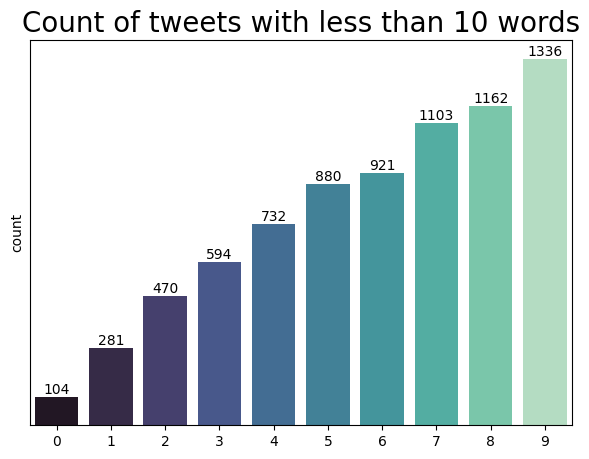

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
df.sort_values(by=['text_len'], ascending=False)

,tweet_text,cyberbullying_type,cyberbullying_type_encoded,text_len
29205,is feminazi an actual word with a denot…\r\nna...,other_cyberbullying,4,768
24516,nickiminaj wutkinda\r\nat this rate the mkr fi...,other_cyberbullying,4,675
30752,i dont retreat\r\nyessssssss \r\nuh why do the...,other_cyberbullying,4,490
44035,you so black and white trying to live like a n...,ethnicity,1,320
1317,eurekalertaaas researchers push to import top ...,not_cyberbullying,3,280
...,...,...,...,...
3347,,not_cyberbullying,3,0
27057,,other_cyberbullying,4,0
25106,,other_cyberbullying,4,0
30467,,other_cyberbullying,4,0


In [ ]:
average_tweet_length = df['text_len'].mean()
print(f"Average Tweet Length: {average_tweet_length:.2f} characters")


Average Tweet Length: 23.30 characters


In [ ]:
# Assuming your DataFrame has a 'text_len' column representing the length of tweets
above_100_len = df[df['text_len'] > 100]
below_100_len = df[df['text_len'] <= 100]

num_above_100 = len(above_100_len)
num_below_100 = len(below_100_len)

print(f"Number of tweets above 100 characters: {num_above_100}")
print(f"Number of tweets at or below 100 characters: {num_below_100}")


Number of tweets above 100 characters: 17
Number of tweets at or below 100 characters: 47675


In [ ]:
# Assuming your DataFrame has a 'text_len' column representing the length of tweets
df = df[df['text_len'] <= 100]

# Optionally, you might want to reset the index after removing rows
df.reset_index(drop=True, inplace=True)


# TOKENISATION

In [ ]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

In [ ]:
from collections import Counter
vocabulary, tokenized_column = Tokenize(df["tweet_text"], max_len)

In [ ]:
df["tweet_text"].iloc[100]

'mirebotan ramiallolah i support that i dont like people like rami who complain about the things he supports when done to others'

In [ ]:
tokenized_column[100]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0, 16332, 10875,     5,
         134,    10,     5,    57,    22,    34,    22, 23964,    26,
        1510,    32,     1,   214,    46,  1380,    55,   298,     3,
         389])

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with 'tweet_text' and 'cyberbullying_type_encoded' columns
# Assuming Tokenize function is defined as provided

# Tokenize the 'tweet_text' column
max_len = 100  # Set your desired sequence length
vocabulary, tokenized_column = Tokenize(df['tweet_text'], max_len)

# Split the dataset into features (X) and labels (y)
X = tokenized_column
y = df["cyberbullying_type_encoded"]

# Split the dataset into training, validation, and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

# Convert tokenized sequences to padded sequences for training
training_padded = pad_sequences(X_train_temp,
                                maxlen=max_len,
                                padding='post',  # You can choose 'pre' or 'post' based on your needs
                                truncating='post')  # You can choose 'pre' or 'post' based on your needs

# Convert tokenized sequences to padded sequences for validation
validation_padded = pad_sequences(X_val,
                                  maxlen=max_len,
                                  padding='post',
                                  truncating='post')

# Convert tokenized sequences to padded sequences for testing
testing_padded = pad_sequences(X_test,
                               maxlen=max_len,
                               padding='post',
                               truncating='post')

# Now, 'training_padded', 'validation_padded', and 'testing_padded' contain the padded sequences



In [ ]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (38140, 100)
Shape of testing tensor:  (4768, 100)


# Long Short-Term Memory (LSTM)

## EXPERIMENTING WITH DIFFERENT LEARNING RATES AND OPTIMIZERS

1. adam - 0.001
2. adam - 0.1
3. rmsprop - 0.001
4. rmspro, - 0.1

In [ ]:
import tensorflow as tf
import time
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense

# Define different optimizers and learning rates to experiment
optimizers = ['adam', 'rmsprop']
learning_rates = [0.001, 0.1]

# Create a table to summarize the results
results_table = []

num_epochs = 5  # Set the number of epochs to 5

for optimizer in optimizers:
    for learning_rate in learning_rates:
        # Define LSTM Model
        modelLSTM = Sequential()
        modelLSTM.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
        modelLSTM.add(SpatialDropout1D(drop_lstm))
        modelLSTM.add(LSTM(n_lstm, return_sequences=False))
        modelLSTM.add(Dropout(drop_lstm))
        modelLSTM.add(Dense(num_classes, activation='softmax'))

        # Set optimizer and learning rate
        optimizer_instance = None
        if optimizer == 'adam':
            optimizer_instance = Adam(learning_rate=learning_rate)
        elif optimizer == 'sgd':
            optimizer_instance = SGD(learning_rate=learning_rate)
        elif optimizer == 'rmsprop':
            optimizer_instance = RMSprop(learning_rate=learning_rate)

        modelLSTM.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])

        print(f"\nTraining with optimizer: {optimizer}, learning rate: {learning_rate}\n")

        # Print model summary
        modelLSTM.summary()

        # Train the model and measure the time
        start_time = time.time()

        history = modelLSTM.fit(training_padded,
                            y_train,
                            epochs=num_epochs,
                            validation_data=(testing_padded, y_test),
                            callbacks=[early_stop],
                            verbose=2)

        end_time = time.time()

        # Extract accuracy from the history
        accuracy = history.history['accuracy'][-1]
        val_accuracy = history.history['val_accuracy'][-1]

        # Calculate training time per epoch
        time_per_epoch = (end_time - start_time) / num_epochs
        print(f"Time for Training Each Epoch: {time_per_epoch:.2f} seconds")

        # Measure inference time
        start_time = time.time()
        modelLSTM.predict(testing_padded[:1])  # Inference on a single example
        end_time = time.time()
        inference_time = end_time - start_time
        print(f"Inference Time: {inference_time:.5f} seconds\n")

        # Store results in the table
        results_table.append({'Optimizer': optimizer, 'Learning Rate': learning_rate,
                              'Total Trainable Parameters': total_parameters,
                              'Time per Epoch': time_per_epoch, 'Inference Time': inference_time,
                              'Accuracy': accuracy, 'Validation Accuracy': val_accuracy})




Training with optimizer: adam, learning rate: 0.001

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 100)          6375800   
                                                                 
 spatial_dropout1d_19 (Spat  (None, 100, 100)          0         
 ialDropout1D)                                                   
                                                                 
 lstm_19 (LSTM)              (None, 128)               117248    
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 6)                 774       
                                                                 
Total params: 6493822 (24.77 MB)
Trainable params: 6493822 (24.77

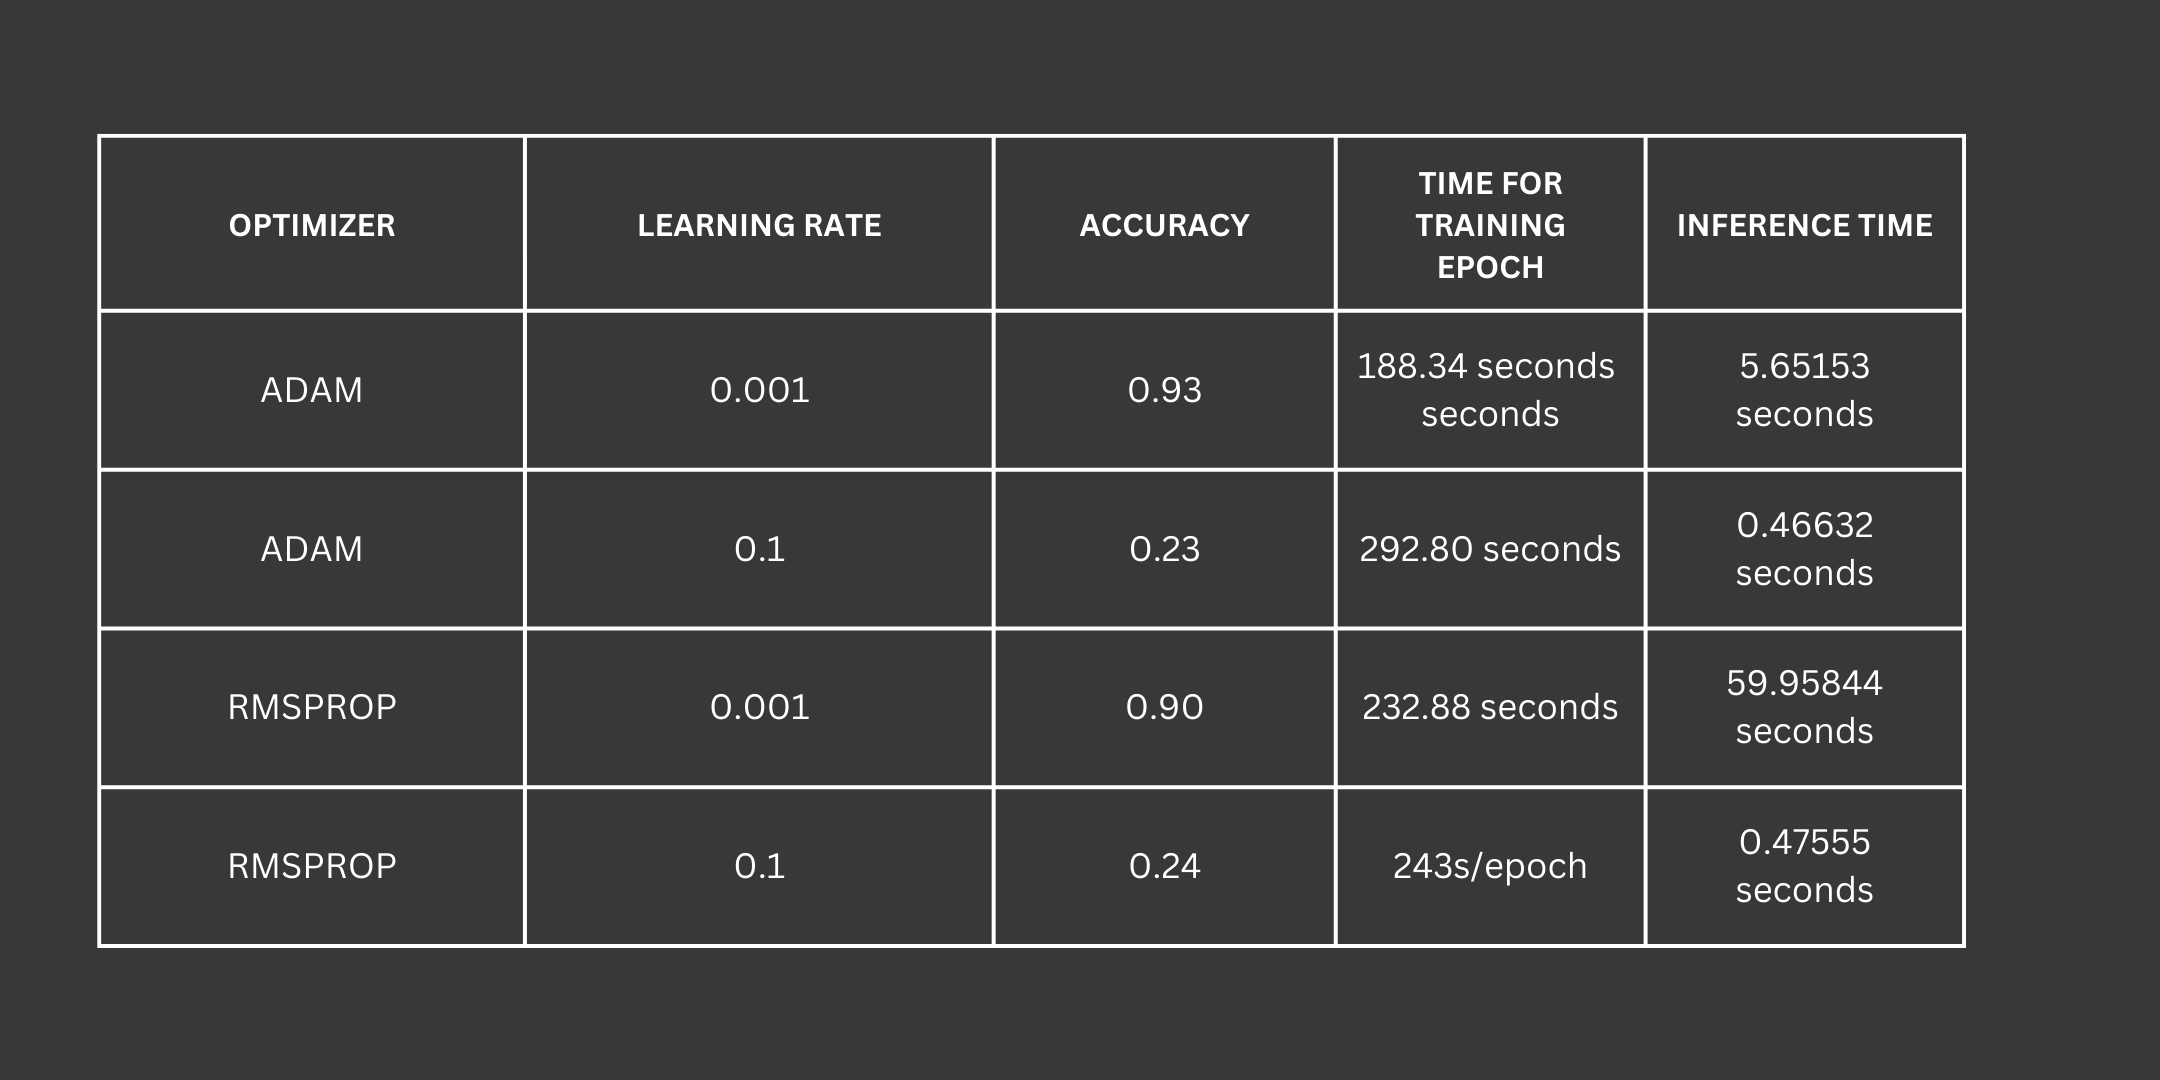

In [ ]:
modelLSTM.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 100, 100)          6375800   
                                                                 
 spatial_dropout1d_22 (Spat  (None, 100, 100)          0         
 ialDropout1D)                                                   
                                                                 
 lstm_22 (LSTM)              (None, 128)               117248    
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 6)                 774       
                                                                 
Total params: 6493822 (24.77 MB)
Trainable params: 6493822 (24.77 MB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [ ]:
modelLSTM.evaluate(testing_padded, y_test)


# Gated Recurrent Unit (GRU):

In [ ]:
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# Assuming vocab_size, embedding_dim, max_len, and y_train_temp are defined
vocab_size = len(vocabulary) + 1
embedding_dim = 100  # You can choose the size based on your requirements
max_len = 100
num_classes = 6  # Number of classes for multiclass classification
num_epochs = 7

# Define different optimizers and learning rates to experiment
optimizers = ['adam', 'sgd']
learning_rates = [0.001, 0.01]

# Create a table to summarize the results
results_table = []

for optimizer in optimizers:
    for learning_rate in learning_rates:
        # Define GRU Model
        modelGRU = Sequential()
        modelGRU.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
        modelGRU.add(SpatialDropout1D(0.2))
        modelGRU.add(GRU(128, return_sequences=False))
        modelGRU.add(Dropout(0.2))
        modelGRU.add(Dense(num_classes, activation='softmax'))

        # Set optimizer and learning rate
        optimizer_instance = None
        if optimizer == 'adam':
            optimizer_instance = Adam(learning_rate=learning_rate)
        elif optimizer == 'sgd':
            optimizer_instance = SGD(learning_rate=learning_rate)

        modelGRU.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])

        # Print model summary
        modelGRU.summary()

        # Calculate total trainable parameters
        total_parameters = sum([tf.keras.backend.count_params(w) for w in modelGRU.trainable_weights])
        print(f"Total Trainable Parameters: {total_parameters}")

        # Train the model and measure the time
        start_time = time.time()

        history = modelGRU.fit(training_padded,
                               y_train_temp,
                               epochs=num_epochs,
                               validation_data=(testing_padded, y_test),
                               callbacks=[EarlyStopping(monitor='val_loss', patience=2)],
                               verbose=2)

        end_time = time.time()

        # Calculate training time per epoch
        time_per_epoch = (end_time - start_time) / num_epochs
        print(f"Time for Training Each Epoch: {time_per_epoch:.2f} seconds")

        # Measure inference time
        start_time = time.time()
        modelGRU.predict(testing_padded[:1])  # Inference on a single example
        end_time = time.time()
        inference_time = end_time - start_time
        print(f"Inference Time: {inference_time:.5f} seconds")

        # Store results in the table
        results_table.append({'Optimizer': optimizer, 'Learning Rate': learning_rate,
                              'Total Trainable Parameters': total_parameters,
                              'Time per Epoch': time_per_epoch, 'Inference Time': inference_time,
                              'Accuracy': history.history['accuracy'][-1], 'Validation Accuracy': history.history['val_accuracy'][-1]})


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 100, 100)          6375800   
                                                                 
 spatial_dropout1d_24 (Spat  (None, 100, 100)          0         
 ialDropout1D)                                                   
                                                                 
 gru_1 (GRU)                 (None, 128)               88320     
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 6)                 774       
                                                                 
Total params: 6464894 (24.66 MB)
Trainable params: 6464894 (24.66 MB)
Non-trainable params: 0 (0.00 Byte)
_____________

1/1 [==============================] - 0s 411ms/step
Inference Time: 58.93255 seconds
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 100, 100)          6375800   
                                                                 
 spatial_dropout1d_25 (Spat  (None, 100, 100)          0         
 ialDropout1D)                                                   
                                                                 
 gru_2 (GRU)                 (None, 128)               88320     
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 6)                 774       
                                                                 
Total params: 6464894 (24.66 MB)


1/1 [==============================] - 0s 399ms/step
Inference Time: 0.45163 seconds
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 100, 100)          6375800   
                                                                 
 spatial_dropout1d_26 (Spat  (None, 100, 100)          0         
 ialDropout1D)                                                   
                                                                 
 gru_3 (GRU)                 (None, 128)               88320     
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 6)                 774       
                                                                 
Total params: 6464894 (24.66 MB)
T

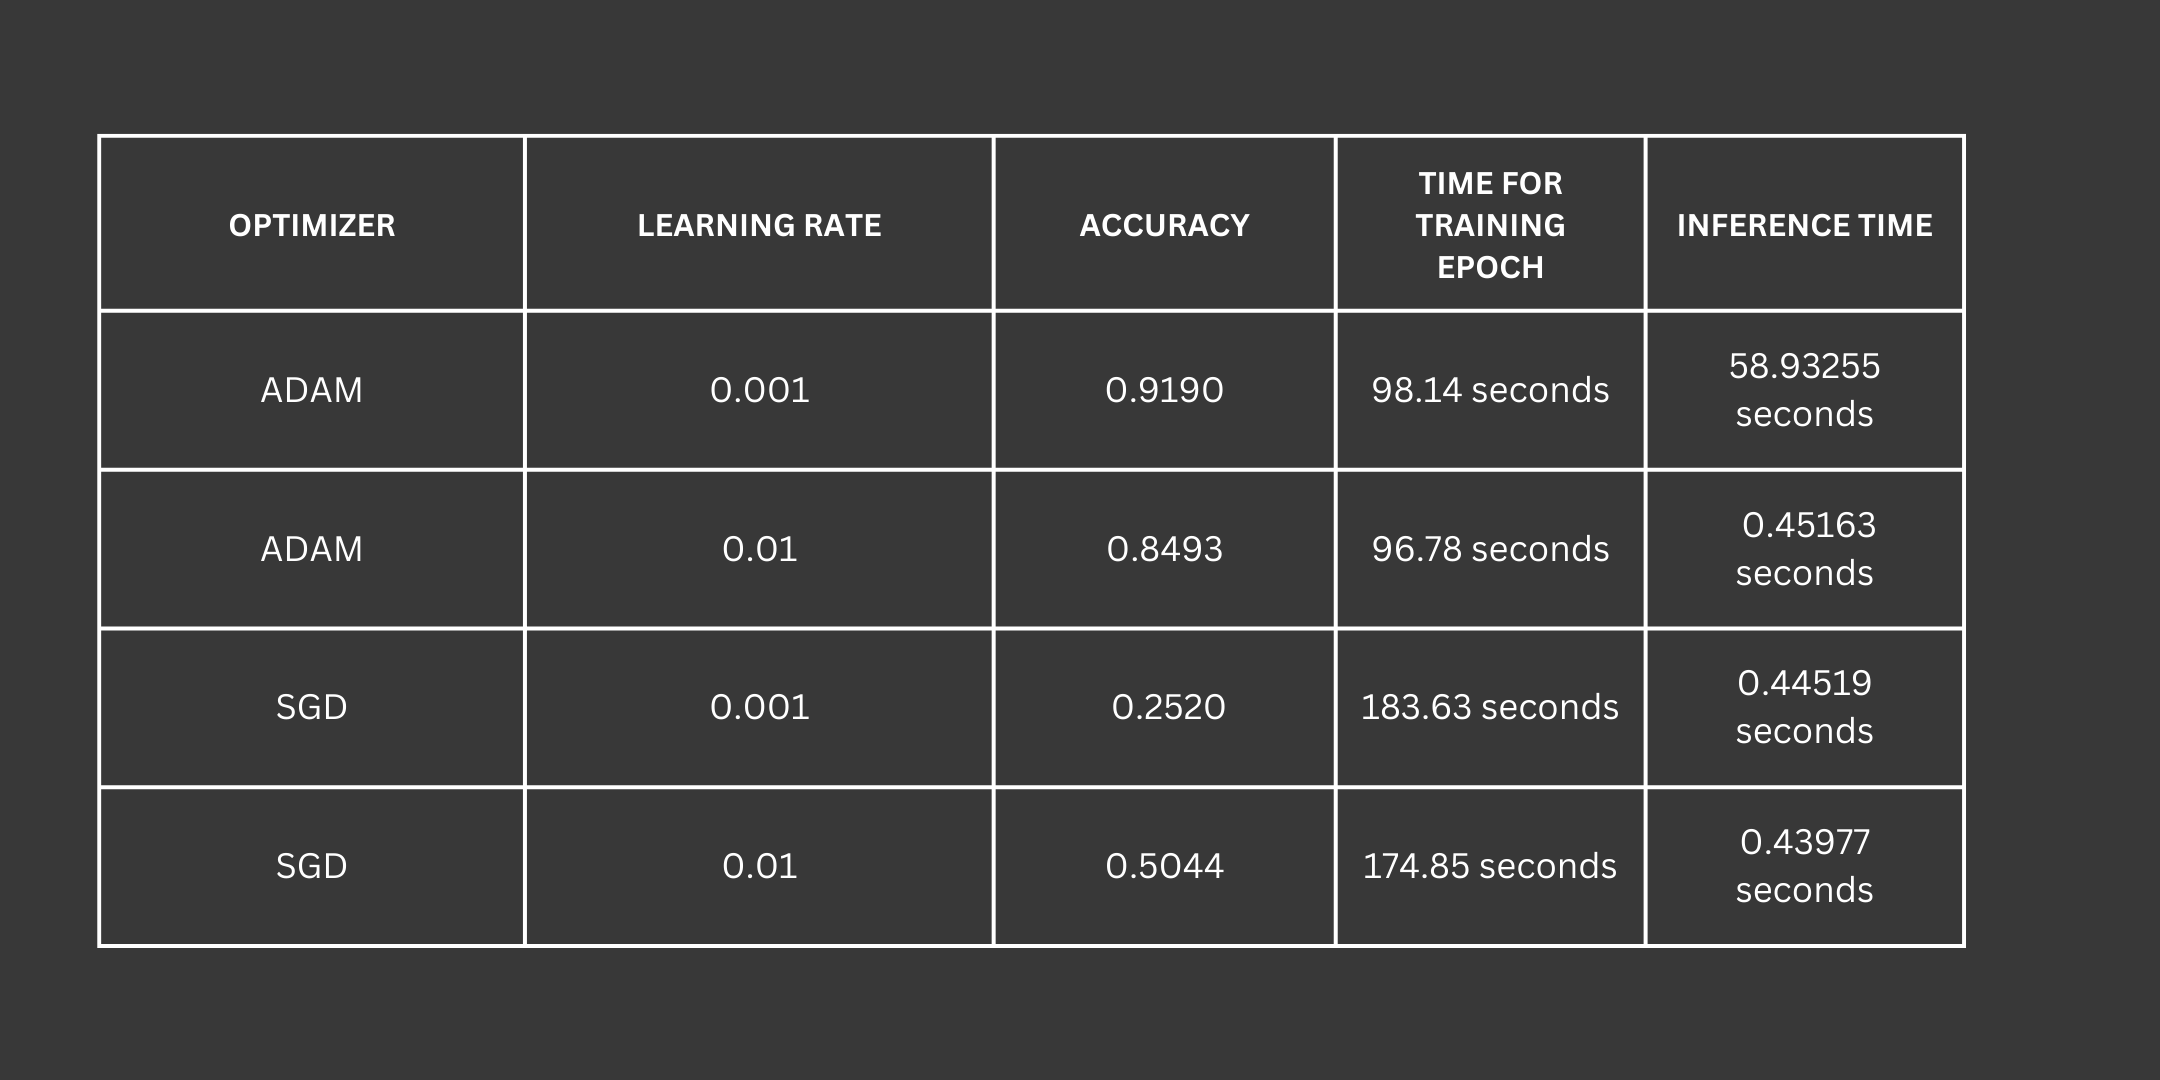

In [ ]:
modelGRU.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 100, 100)          6375800   
                                                                 
 spatial_dropout1d_27 (Spat  (None, 100, 100)          0         
 ialDropout1D)                                                   
                                                                 
 gru_4 (GRU)                 (None, 128)               88320     
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 6)                 774       
                                                                 
Total params: 6464894 (24.66 MB)
Trainable params: 6464894 (24.66 MB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [ ]:
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam, SGD

# Assuming vocab_size, embedding_dim, max_len, and y_train_temp are defined
vocab_size = len(vocabulary) + 1
embedding_dim = 300  # You can choose the size based on your requirements
max_len = 100
num_classes = 6  # Number of classes for multiclass classification
num_epochs = 7

# Define different optimizers and learning rates to experiment
optimizers = ['RAdam', 'Adadelta']
learning_rates = [0.0001, 0.01]
batch_sizes = [32, 64]  # Experiment with different batch sizes

# Create a table to summarize the results
results_table = []

for optimizer in optimizers:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            # Define GRU Model
            modelGRU2 = Sequential()
            modelGRU2.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
            modelGRU2.add(SpatialDropout1D(0.2))
            modelGRU2.add(GRU(128, return_sequences=False))
            modelGRU2.add(Dropout(0.2))
            modelGRU2.add(Dense(num_classes, activation='softmax'))

            # Set optimizer and learning rate
            optimizer_instance = None
            if optimizer == 'RAdam':
                optimizer_instance = Adam(learning_rate=learning_rate)
            elif optimizer == 'Adadelta':
                optimizer_instance = SGD(learning_rate=learning_rate)

            modelGRU2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])


            # Print model summary
            modelGRU2.summary()

            # Calculate total trainable parameters
            total_parameters = sum([tf.keras.backend.count_params(w) for w in modelGRU2.trainable_weights])
            print(f"Total Trainable Parameters: {total_parameters}")

            # Train the model and measure the time
            start_time = time.time()

            history = modelGRU2.fit(training_padded,
                                   y_train_temp,
                                   epochs=num_epochs,
                                   batch_size=batch_size,  # Include batch size
                                   validation_data=(testing_padded, y_test),
                                   callbacks=[EarlyStopping(monitor='val_loss', patience=2)],
                                   verbose=2)

            end_time = time.time()

            # Calculate training time per epoch
            time_per_epoch = (end_time - start_time) / num_epochs
            print(f"Time for Training Each Epoch: {time_per_epoch:.2f} seconds")

            # Measure inference time
            start_time = time.time()
            modelGRU2.predict(testing_padded[:1])  # Inference on a single example
            end_time = time.time()
            inference_time = end_time - start_time
            print(f"Inference Time: {inference_time:.5f} seconds")

            # Store results in the table
            results_table.append({'Optimizer': optimizer, 'Learning Rate': learning_rate, 'Batch Size': batch_size,
                                  'Total Trainable Parameters': total_parameters,
                                  'Time per Epoch': time_per_epoch, 'Inference Time': inference_time,
                                  'Accuracy': history.history['accuracy'][-1], 'Validation Accuracy': history.history['val_accuracy'][-1]})


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 100, 300)          19127400  
                                                                 
 spatial_dropout1d_30 (Spat  (None, 100, 300)          0         
 ialDropout1D)                                                   
                                                                 
 gru_7 (GRU)                 (None, 128)               165120    
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 6)                 774       
                                                                 
Total params: 19293294 (73.60 MB)
Trainable params: 19293294 (73.60 MB)
Non-trainable params: 0 (0.00 Byte)
___________

# TRANSFER LEARNING - WORD2VEC

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [ ]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [ ]:
X_data, y_data = np.array(df['tweet_text']), np.array(df['cyberbullying_type_encoded'])

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)


In [ ]:

# Tokenizing and padding the sequences
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
vocab_length = 60000  # You need to set an appropriate vocab_length
tokenizer.num_words = vocab_length

X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_val = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=input_length)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_val.shape:", X_val.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (38140, 60)
X_val.shape: (4767, 60)
X_test.shape: (4768, 60)


In [ ]:
# Creating an embedding matrix using Word2Vec
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[token] = word2vec_model.wv[word]

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (60000, 100)


In [ ]:
# Define the model
def getModel():
    embedding_layer = Embedding(input_dim=vocab_length,
                                output_dim=Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(6, activation='softmax'),  # Assuming you have defined NUM_CLASSES
    ],
    name="Sentiment_Model")
    return model


In [ ]:
%%time

# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 10511
CPU times: user 13.7 s, sys: 113 ms, total: 13.8 s
Wall time: 10.8 s


In [ ]:
# Create and compile the model
training_model = getModel()
training_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])


In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0)]

In [ ]:
# Train the model
history = training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=10,
    validation_data=(X_val, y_val),  # Add validation data
    callbacks=callbacks,
    verbose=1,
)


Epoch 1/10
38/38 [==============================] - 297s 6s/step - loss: 0.8829 - accuracy: 0.6658 - val_loss: 0.5074 - val_accuracy: 0.7890 - lr: 0.0010
Epoch 2/10
38/38 [==============================] - 205s 5s/step - loss: 0.5044 - accuracy: 0.7877 - val_loss: 0.4636 - val_accuracy: 0.8062 - lr: 0.0010
Epoch 3/10
38/38 [==============================] - 208s 5s/step - loss: 0.4692 - accuracy: 0.8023 - val_loss: 0.4451 - val_accuracy: 0.8123 - lr: 0.0010
Epoch 4/10
38/38 [==============================] - 208s 5s/step - loss: 0.4519 - accuracy: 0.8087 - val_loss: 0.4360 - val_accuracy: 0.8171 - lr: 0.0010
Epoch 5/10
38/38 [==============================] - 209s 6s/step - loss: 0.4386 - accuracy: 0.8124 - val_loss: 0.4296 - val_accuracy: 0.8229 - lr: 0.0010
Epoch 6/10
38/38 [==============================] - 209s 6s/step - loss: 0.4262 - accuracy: 0.8182 - val_loss: 0.4189 - val_accuracy: 0.8255 - lr: 0.0010
Epoch 7/10
38/38 [==============================] - 208s 5s/step - loss: 0.4

In [ ]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           6000000   
                                                                 
 bidirectional (Bidirection  (None, 60, 200)           160800    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 60, 200)           240800    
 onal)                                                           
                                                                 
 conv1d (Conv1D)             (None, 56, 100)           100100    
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                   

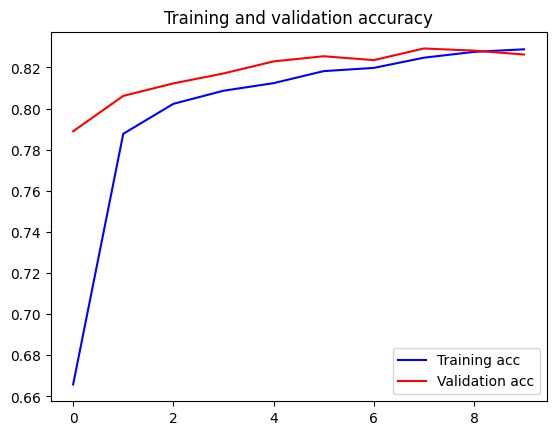

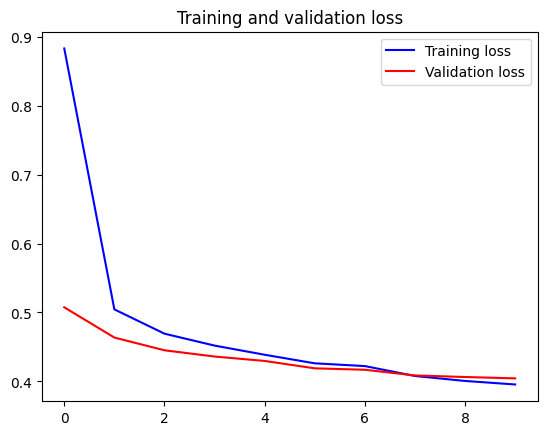

In [ ]:
import matplotlib.pyplot as plt

acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# CONCLUSION

LSTM performed the best out of the 3 models when tuned with learning rate of 0.001, and optimser : adam. with accuracy of 0.93 as compared to gru with0.91 and word2vec withnan accuracy of 0.82

# PROBLEM 2

Problem statement : The financial sentiment analysis research aims to develop a model that can accurately classify the sentiment of financial sentences into positive, negative, or neutral categories. This analysis is crucial for understanding market trends, making informed investment decisions, and assessing the overall sentiment in financial news.


Expected outcome : asentiment analysis model that can accurately classify financial sentences into one of the three categories: positive, negative, or neutral.

Dataset Description:
The dataset consists of financial sentences labeled with sentiments, including positive, negative, and neutral labels. Each data point in the dataset is associated with a specific sentiment label, allowing for supervised machine learning model training.

Link to Dataset: [https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis/data]

Methodology :
1. Data exploration
2. Data pereprocessing
3. Tokenisation
3. Modelling : LSTM, GRU, WORD2VEC
4. Evaluating on accuracy



In [ ]:
!kaggle datasets download -d sbhatti/financial-sentiment-analysis

  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 113MB/s]


In [ ]:
import zipfile

# Define the path to the uploaded ZIP file
zip_file_path = '/content/financial-sentiment-analysis.zip'

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
df2 = pd.read_csv('/content/financial-sentiment-analysis.zip')
df2.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df2.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [ ]:
df2.shape

(5842, 2)

# EXPLORATORY ANALYSIS

<Axes: xlabel='Sentiment', ylabel='count'>

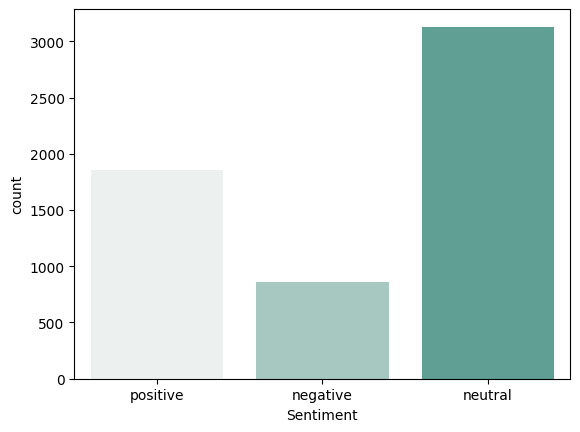

In [ ]:
sns.countplot(data=df2, x='Sentiment', palette='light:#5A9')


In [ ]:
df2['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [ ]:
df2.columns = ['Sentence', 'Sentiment']df2['Sentiment'] = df2['Sentiment'].map({'positive': 0, 'negative': 1, 'neutral': 2})
df2.head()


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",1
2,"For the last quarter of 2010 , Componenta 's n...",0
3,According to the Finnish-Russian Chamber of Co...,2
4,The Swedish buyout firm has sold its remaining...,2


In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# get the text based on ratings!
rating_zero = df2['Sentence'][df2['Sentiment'] == 0]
rating_one = df2['Sentence'][df2['Sentiment'] == 1]

# word tokenize the data
def list_tokenizer(rating):
    ratings = " ".join(rating)
    ratings = nltk.word_tokenize(ratings)
    return str(ratings)

# visualizer
def word_cloud(rating, number):
    wc = WordCloud(background_color = 'black', max_font_size = 50, max_words = 100)
    wc.generate(rating)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.title(f'WordCloud for {number} label')
    plt.axis('off');

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

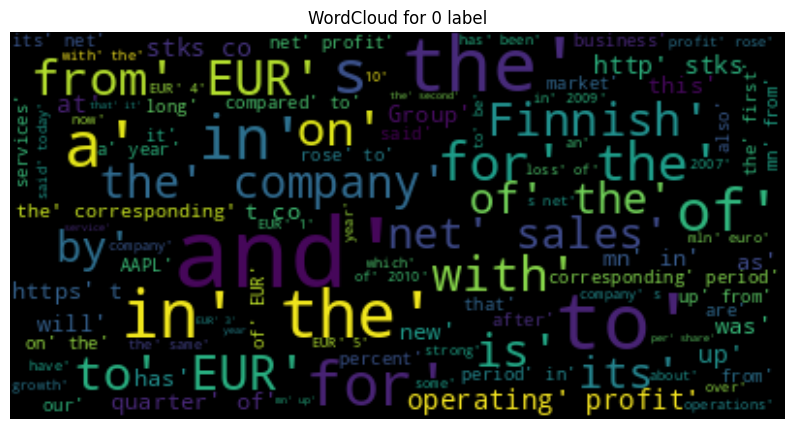

In [ ]:
word_cloud(list_tokenizer(rating_zero), 0)

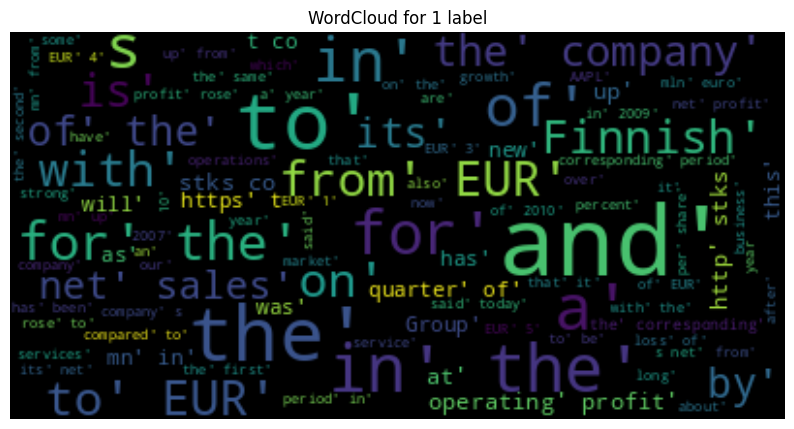

In [ ]:
word_cloud(list_tokenizer(rating_zero), 1)


# PREPROCSSING

In [ ]:
df2.head()

,Sentence,Sentiment,tweet
0,The GeoSolutions technology will leverage Bene...,0,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",1,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"For the last quarter of 2010 , Componenta 's n...",0,"for the last quarter of 2010 , componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...,2,according to the finnish-russian chamber of co...
4,The Swedish buyout firm has sold its remaining...,2,the swedish buyout firm has sold its remaining...


In [ ]:
# 1. Lowering the case!
df2['Sentence'] = df2['Sentence'].apply(lambda x: x.lower())
df2.head()

,Sentence,Sentiment,tweet
0,the geosolutions technology will leverage bene...,0,the geosolutions technology will leverage bene...
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",1,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"for the last quarter of 2010 , componenta 's n...",0,"for the last quarter of 2010 , componenta 's n..."
3,according to the finnish-russian chamber of co...,2,according to the finnish-russian chamber of co...
4,the swedish buyout firm has sold its remaining...,2,the swedish buyout firm has sold its remaining...


In [ ]:
# 2. remove emails
df2['Sentence'] = df2['Sentence'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))
df2.head()

,Sentence,Sentiment,tweet
0,the geosolutions technology will leverage bene...,0,the geosolutions technology will leverage bene...
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",1,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"for the last quarter of 2010 , componenta 's n...",0,"for the last quarter of 2010 , componenta 's n..."
3,according to the finnish-russian chamber of co...,2,according to the finnish-russian chamber of co...
4,the swedish buyout firm has sold its remaining...,2,the swedish buyout firm has sold its remaining...


In [ ]:
# 3. remove urls
df2['Sentence'] = df2['Sentence'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
df2.head()

,Sentence,Sentiment,tweet
0,the geosolutions technology will leverage bene...,0,the geosolutions technology will leverage bene...
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",1,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"for the last quarter of 2010 , componenta 's n...",0,"for the last quarter of 2010 , componenta 's n..."
3,according to the finnish-russian chamber of co...,2,according to the finnish-russian chamber of co...
4,the swedish buyout firm has sold its remaining...,2,the swedish buyout firm has sold its remaining...


In [ ]:
# 4. remove re-tweet
df2['Sentence'] = df2['Sentence'].apply(lambda x: re.sub('RT', '', x))
df2.head()

,Sentence,Sentiment,tweet
0,the geosolutions technology will leverage bene...,0,the geosolutions technology will leverage bene...
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",1,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"for the last quarter of 2010 , componenta 's n...",0,"for the last quarter of 2010 , componenta 's n..."
3,according to the finnish-russian chamber of co...,2,according to the finnish-russian chamber of co...
4,the swedish buyout firm has sold its remaining...,2,the swedish buyout firm has sold its remaining...


In [ ]:
df2 = df2.drop(columns=['tweet'])

In [ ]:
# 6. remove multiple spaces
df2['Sentence'] = df2['Sentence'].apply(lambda x: " ".join(x.split()))
df2.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,0
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",1
2,"for the last quarter of 2010 , componenta 's n...",0
3,according to the finnish-russian chamber of co...,2
4,the swedish buyout firm has sold its remaining...,2


In [ ]:
# 7. remove html tags
from bs4 import BeautifulSoup
df2['Sentence'] = df2['Sentence'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

df2.head()

<ipython-input-113-76774f1b7f8f>:3: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,0
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",1
2,"for the last quarter of 2010 , componenta 's n...",0
3,according to the finnish-russian chamber of co...,2
4,the swedish buyout firm has sold its remaining...,2


In [ ]:
# 8. remove accented character
import unicodedata

def remove_accented_chars(x):
    x =  unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

df2['Sentence'] = df2['Sentence'].apply(remove_accented_chars)
df2.head()


,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,0
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",1
2,"for the last quarter of 2010 , componenta 's n...",0
3,according to the finnish-russian chamber of co...,2
4,the swedish buyout firm has sold its remaining...,2


In [ ]:
# 9. remove stopwords

from spacy.lang.en.stop_words import STOP_WORDS
df2['Sentence'] = df2['Sentence'].apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) )

df2.head()


,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,0
1,"$esi lows, $1.50 $2.50 bk real possibility",1
2,"quarter 2010 , componenta net sales doubled eu...",0
3,"according finnish-russian chamber commerce , m...",2
4,swedish buyout firm sold remaining 22.4 percen...,2


In [ ]:
# 10. convert to lemma_
import spacy

nlp = spacy.load('en_core_web_sm')
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)

    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

df2['Sentence'] = df2['Sentence'].apply(lambda x: make_to_base(x))
df2.head()


,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,0
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility",1
2,"quarter 2010 , componenta net sale double eur1...",0
3,"accord finnish - russian chamber commerce , ma...",2
4,swedish buyout firm sell remain 22.4 percent s...,2


# LSTM

In [ ]:
X_data, y_data = np.array(df2['Sentence']), np.array(df2['Sentiment'])

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)


In [ ]:
# Define input parameters
input_length = 60  # Set an appropriate length
vocab_size = 60000  # Set an appropriate vocab_size
embedding_dim = 50  # Set an appropriate embedding_dim
max_len = 60  # Set an appropriate max_len
drop_lstm = 0.2  # Set an appropriate drop_lstm
n_lstm = 50

In [ ]:
# Tokenizing and padding the sequences
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(df2['Sentence'])

X_data = pad_sequences(tokenizer.texts_to_sequences(df2['Sentence']), maxlen=max_len)
y_data = np.array(df2['Sentiment'])


In [ ]:
# Define the LSTM model
modelLSTM2 = Sequential()
modelLSTM2.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
modelLSTM2.add(SpatialDropout1D(drop_lstm))
modelLSTM2.add(LSTM(n_lstm, return_sequences=False))
modelLSTM2.add(Dropout(drop_lstm))
modelLSTM2.add(Dense(3, activation='softmax'))  # Assuming 3 classes (positive, negative, neutral)


In [ ]:
# Set optimizer and compile the model
optimizer_instance = Adam(learning_rate=0.001)  # Set an appropriate learning rate
modelLSTM2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])

# Print model summary
modelLSTM2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 60, 50)            3000000   
                                                                 
 spatial_dropout1d_3 (Spati  (None, 60, 50)            0         
 alDropout1D)                                                    
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 3)                 153       
                                                                 
Total params: 3020353 (11.52 MB)
Trainable params: 3020353 (11.52 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
print(f"Input Shape - X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
print(f"Number of Classes: {np.max(y_train) + 1}")  # Assuming classes are labeled from 0 to (num_classes - 1)

Input Shape - X_train: (4673, 60), X_val: (584, 60), X_test: (585, 60)
Number of Classes: 3


In [ ]:
# Train the model
num_epochs = 5
history = modelLSTM2.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=2)

# Evaluate the model
loss, accuracy = modelLSTM2.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/5
147/147 - 18s - loss: 0.9352 - accuracy: 0.5643 - val_loss: 0.8531 - val_accuracy: 0.6233 - 18s/epoch - 124ms/step
Epoch 2/5
147/147 - 13s - loss: 0.6781 - accuracy: 0.7214 - val_loss: 0.7559 - val_accuracy: 0.6969 - 13s/epoch - 87ms/step
Epoch 3/5
147/147 - 16s - loss: 0.4287 - accuracy: 0.8200 - val_loss: 0.7796 - val_accuracy: 0.6678 - 16s/epoch - 108ms/step
Epoch 4/5
147/147 - 18s - loss: 0.2956 - accuracy: 0.8686 - val_loss: 0.9773 - val_accuracy: 0.6370 - 18s/epoch - 123ms/step
Epoch 5/5
147/147 - 13s - loss: 0.2139 - accuracy: 0.8956 - val_loss: 1.1097 - val_accuracy: 0.6267 - 13s/epoch - 87ms/step
19/19 [==============================] - 0s 11ms/step - loss: 0.9691 - accuracy: 0.6752
Test Loss: 0.9691
Test Accuracy: 0.6752


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 60, 50)            3000000   
                                                                 
 spatial_dropout1d_11 (Spat  (None, 60, 50)            0         
 ialDropout1D)                                                   
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_20 (Dense)            (None, 3)                 153       
                                                                 
Total params: 3020353 (11.52 MB)
Trainable params: 3020353 (11.52 MB)
Non-trainable params: 0 (0.00 Byte)
_____________

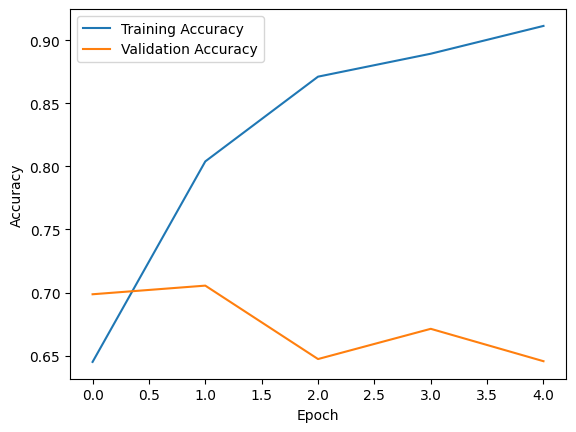

In [ ]:
import matplotlib.pyplot as plt

# Define the LSTM model
modelLSTM2 = Sequential()
modelLSTM2.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
modelLSTM2.add(SpatialDropout1D(drop_lstm))
modelLSTM2.add(LSTM(n_lstm, return_sequences=False))
modelLSTM2.add(Dropout(drop_lstm))
modelLSTM2.add(Dense(3, activation='softmax'))  # Assuming 3 classes (positive, negative, neutral)

# Set optimizer and compile the model with a learning rate of 0.01
learning_rate = 0.01
optimizer_instance = Adam(learning_rate=learning_rate)  # Set an appropriate learning rate
modelLSTM2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])

# Print model summary
modelLSTM2.summary()

# Train the model
num_epochs = 5
history = modelLSTM2.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=2)

# Evaluate the model
loss, accuracy = modelLSTM2.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# overfitting observed, changing parameters

In [ ]:
# Updated parameters
input_length = 60
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the OOV token
embedding_dim = 50
max_len = 60
drop_lstm = 0.5
n_lstm = 32

# Tokenizing and padding the sequences
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(df2['Sentence'])

X_data = pad_sequences(tokenizer.texts_to_sequences(df2['Sentence']), maxlen=max_len)
y_data = np.array(df2['Sentiment'])

# Define the LSTM model
modelLSTM3 = Sequential()
modelLSTM3.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
modelLSTM3.add(SpatialDropout1D(drop_lstm))
modelLSTM3.add(LSTM(n_lstm, return_sequences=False))
modelLSTM3.add(Dropout(drop_lstm))
modelLSTM3.add(Dense(3, activation='softmax'))  # Assuming 3 classes (positive, negative, neutral)

# Set optimizer and compile the model
optimizer_instance = Adam(learning_rate=0.001)  # Set an appropriate learning rate
modelLSTM3.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])

# Print model summary
modelLSTM3.summary()
# Train the model
num_epochs = 5
history = modelLSTM3.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=2)

# Evaluate the model
loss, accuracy = modelLSTM3.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 60, 50)            530450    
                                                                 
 spatial_dropout1d_20 (Spat  (None, 60, 50)            0         
 ialDropout1D)                                                   
                                                                 
 lstm_33 (LSTM)              (None, 32)                10624     
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 3)                 99        
                                                                 
Total params: 541173 (2.06 MB)
Trainable params: 541173 (2.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

# increasing just the drop_lstm made overfitting worse

Epoch 1/5
147/147 - 6s - loss: 0.4065 - accuracy: 0.8380 - val_loss: 0.3863 - val_accuracy: 0.8349 - 6s/epoch - 38ms/step
Epoch 2/5
147/147 - 6s - loss: 0.3242 - accuracy: 0.8607 - val_loss: 0.4034 - val_accuracy: 0.8152 - 6s/epoch - 44ms/step
Epoch 3/5
147/147 - 5s - loss: 0.2820 - accuracy: 0.8733 - val_loss: 0.4516 - val_accuracy: 0.7956 - 5s/epoch - 36ms/step
Epoch 4/5
147/147 - 5s - loss: 0.2425 - accuracy: 0.8892 - val_loss: 0.5085 - val_accuracy: 0.7904 - 5s/epoch - 37ms/step
Epoch 5/5
147/147 - 6s - loss: 0.2237 - accuracy: 0.8930 - val_loss: 0.5577 - val_accuracy: 0.7819 - 6s/epoch - 41ms/step


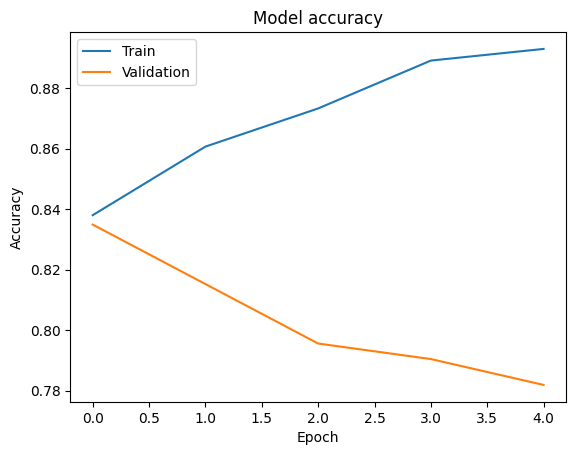

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = modelLSTM3.fit(X_data, y_data, epochs=num_epochs, validation_split=0.2, verbose=2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 100, 300)          3182700   
                                                                 
 spatial_dropout1d_22 (Spat  (None, 100, 300)          0         
 ialDropout1D)                                                   
                                                                 
 lstm_35 (LSTM)              (None, 32)                42624     
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 3)                 99        
                                                                 
Total params: 3225423 (12.30 MB)
Trainable params: 3225423 (12.30 MB)
Non-trainable params: 0 (0.00 Byte)
_____________

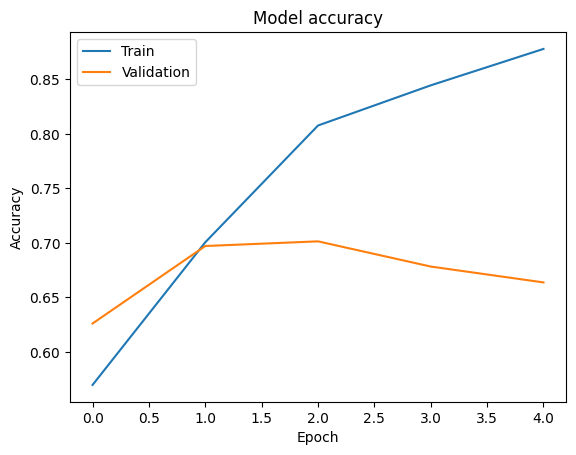

In [ ]:
# Updated parameters
input_length = 100
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the OOV token
embedding_dim = 300
max_len = 100
drop_lstm = 0.6
n_lstm = 32

# Tokenizing and padding the sequences
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(df2['Sentence'])

X_data = pad_sequences(tokenizer.texts_to_sequences(df2['Sentence']), maxlen=max_len)
y_data = np.array(df2['Sentiment'])

# Define the LSTM model
modelLSTM4 = Sequential()
modelLSTM4.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
modelLSTM4.add(SpatialDropout1D(drop_lstm))
modelLSTM4.add(LSTM(n_lstm, return_sequences=False))
modelLSTM4.add(Dropout(drop_lstm))
modelLSTM4.add(Dense(3, activation='softmax'))  # Assuming 3 classes (positive, negative, neutral)

# Set optimizer and compile the model
optimizer_instance = Adam(learning_rate=0.001)  # Set an appropriate learning rate
modelLSTM4.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])

# Print model summary
modelLSTM4.summary()
# Train the model
num_epochs = 5
history = modelLSTM3.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=2)

# Evaluate the model
loss, accuracy = modelLSTM3.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
import matplotlib.pyplot as plt

# Train the model and store the history
history = modelLSTM4.fit(X_data, y_data, epochs=num_epochs, validation_split=0.2, verbose=2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 120, 300)          3182700   
                                                                 
 spatial_dropout1d_24 (Spat  (None, 120, 300)          0         
 ialDropout1D)                                                   
                                                                 
 lstm_37 (LSTM)              (None, 32)                42624     
                                                                 
 dropout_24 (Dropout)        (None, 32)                0         
                                                                 
 dense_33 (Dense)            (None, 3)                 99        
                                                                 
Total params: 3225423 (12.30 MB)
Trainable params: 3225423 (12.30 MB)
Non-trainable params: 0 (0.00 Byte)
_____________

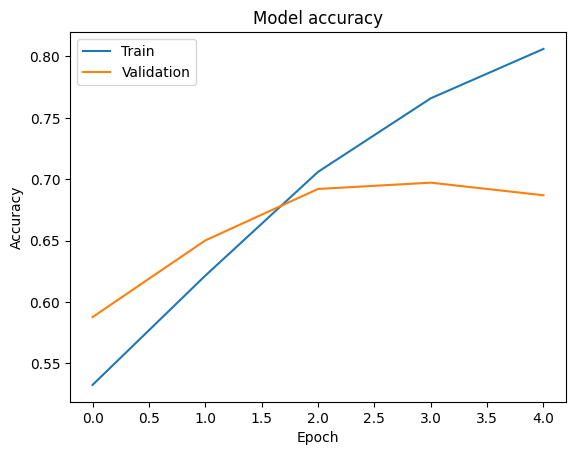

In [ ]:
# Updated parameters
input_length = 120
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the OOV token
embedding_dim = 300
max_len = 120
drop_lstm = 0.8
n_lstm = 32

# Tokenizing and padding the sequences
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(df2['Sentence'])

X_data = pad_sequences(tokenizer.texts_to_sequences(df2['Sentence']), maxlen=max_len)
y_data = np.array(df2['Sentiment'])

# Define the LSTM model
modelLSTM4 = Sequential()
modelLSTM4.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
modelLSTM4.add(SpatialDropout1D(drop_lstm))
modelLSTM4.add(LSTM(n_lstm, return_sequences=False))
modelLSTM4.add(Dropout(drop_lstm))
modelLSTM4.add(Dense(3, activation='softmax'))  # Assuming 3 classes (positive, negative, neutral)

# Set optimizer and compile the model
optimizer_instance = Adam(learning_rate=0.001)  # Set an appropriate learning rate
modelLSTM4.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])

# Print model summary
modelLSTM4.summary()
# Train the model
num_epochs = 5
history = modelLSTM3.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=2)

# Evaluate the model
loss, accuracy = modelLSTM3.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
import matplotlib.pyplot as plt

# Train the model and store the history
history = modelLSTM4.fit(X_data, y_data, epochs=num_epochs, validation_split=0.2, verbose=2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

DECREASED OVERFITTING MY INCREASING THE VAKUES OF INPUT LENGTH, EMBEDDING DIM, DOPLSTM

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 180, 300)          3182700   
                                                                 
 spatial_dropout1d_25 (Spat  (None, 180, 300)          0         
 ialDropout1D)                                                   
                                                                 
 lstm_38 (LSTM)              (None, 48)                67008     
                                                                 
 dropout_25 (Dropout)        (None, 48)                0         
                                                                 
 dense_34 (Dense)            (None, 3)                 147       
                                                                 
Total params: 3249855 (12.40 MB)
Trainable params: 3249855 (12.40 MB)
Non-trainable params: 0 (0.00 Byte)
_____________

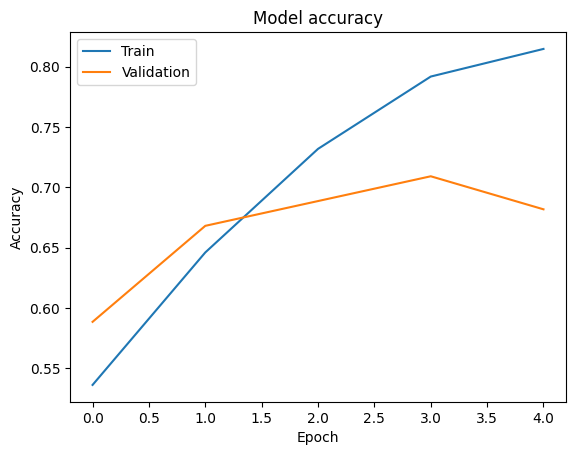

In [ ]:
# Updated parameters
input_length = 180
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the OOV token
embedding_dim = 300
max_len = 180
drop_lstm = 0.8
n_lstm = 48

# Tokenizing and padding the sequences
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(df2['Sentence'])

X_data = pad_sequences(tokenizer.texts_to_sequences(df2['Sentence']), maxlen=max_len)
y_data = np.array(df2['Sentiment'])

# Define the LSTM model
modelLSTM4 = Sequential()
modelLSTM4.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
modelLSTM4.add(SpatialDropout1D(drop_lstm))
modelLSTM4.add(LSTM(n_lstm, return_sequences=False))
modelLSTM4.add(Dropout(drop_lstm))
modelLSTM4.add(Dense(3, activation='softmax'))  # Assuming 3 classes (positive, negative, neutral)

# Set optimizer and compile the model
optimizer_instance = Adam(learning_rate=0.001)  # Set an appropriate learning rate
modelLSTM4.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])

# Print model summary
modelLSTM4.summary()
# Train the model
num_epochs = 5
history = modelLSTM3.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=2)

# Evaluate the model
loss, accuracy = modelLSTM3.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
import matplotlib.pyplot as plt

# Train the model and store the history
history = modelLSTM4.fit(X_data, y_data, epochs=num_epochs, validation_split=0.2, verbose=2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# WORD2VEC

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [ ]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: str(x).split(), X_train))

In [ ]:
X_data, y_data = np.array(df2['Sentence']), np.array(df2['Sentiment'])

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)


In [ ]:
# Tokenizing and padding the sequences
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
vocab_length = 60000  # You need to set an appropriate vocab_length
tokenizer.num_words = vocab_length

X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_val = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=input_length)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_val.shape:", X_val.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (4673, 180)
X_val.shape: (584, 180)
X_test.shape: (585, 180)


In [ ]:
# Creating an embedding matrix using Word2Vec
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[token] = word2vec_model.wv[word]

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (60000, 100)


In [ ]:
# Define the model
def getModel():
    embedding_layer = Embedding(input_dim=vocab_length,
                                output_dim=Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(6, activation='softmax'),  # Assuming you have defined NUM_CLASSES
    ],
    name="Sentiment_Model")
    return model


In [ ]:
%%time

# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 1966
CPU times: user 1.09 s, sys: 22.3 ms, total: 1.11 s
Wall time: 796 ms


In [ ]:
# Create and compile the model
training_model = getModel()
training_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])


In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0)]

In [ ]:
# Train the model
history = training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=10,
    validation_data=(X_val, y_val),  # Add validation data
    callbacks=callbacks,
    verbose=1,
)


Epoch 1/10
5/5 [==============================] - 135s 19s/step - loss: 1.6011 - accuracy: 0.4624 - val_loss: 1.2608 - val_accuracy: 0.5223 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 86s 17s/step - loss: 1.1043 - accuracy: 0.5309 - val_loss: 1.0267 - val_accuracy: 0.5342 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 85s 17s/step - loss: 1.0012 - accuracy: 0.4828 - val_loss: 0.9822 - val_accuracy: 0.5377 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 95s 19s/step - loss: 0.9763 - accuracy: 0.5350 - val_loss: 0.9918 - val_accuracy: 0.5479 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 114s 23s/step - loss: 0.9651 - accuracy: 0.5487 - val_loss: 0.9769 - val_accuracy: 0.5531 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 110s 22s/step - loss: 0.9550 - accuracy: 0.5542 - val_loss: 0.9871 - val_accuracy: 0.5377 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - 105s 21s/step - loss: 0.9484 - accu

In [ ]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 180, 100)          6000000   
                                                                 
 bidirectional_14 (Bidirect  (None, 180, 200)          160800    
 ional)                                                          
                                                                 
 bidirectional_15 (Bidirect  (None, 180, 200)          240800    
 ional)                                                          
                                                                 
 conv1d_7 (Conv1D)           (None, 176, 100)          100100    
                                                                 
 global_max_pooling1d_7 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                   

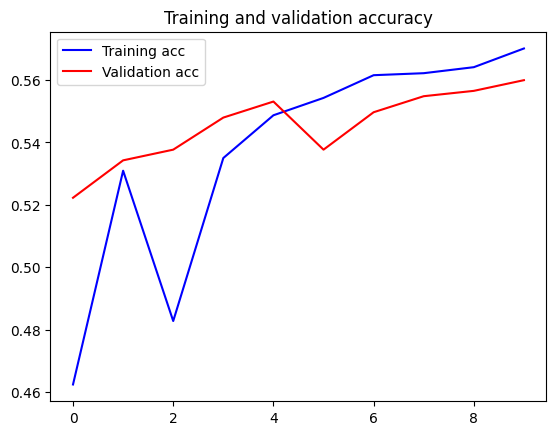

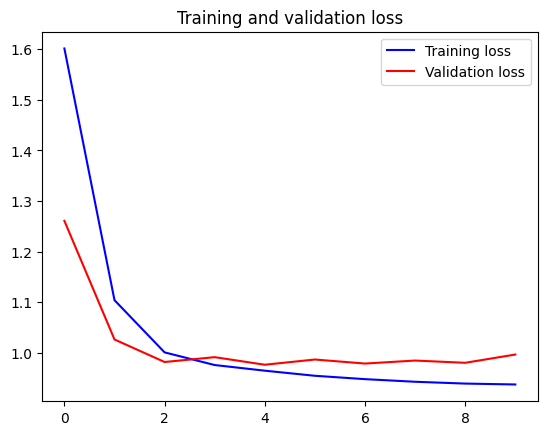

In [ ]:
import matplotlib.pyplot as plt

acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

CONCLUSION
LSTM performed the best out of the 2 models when tuned with learning rate of 0.001, and optimser : adam. with accuracy of 0.81 as compared to g word2vec withnan accuracy of 0.5701